In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,14)

from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [2]:
def subsamplerizes(file):
    data=pd.read_csv(f'DATA_CSV/{file}', index_col=0)
    data=data[::6] #real sampling rate
    num_samples=256 #0.9263671875 seconds corresponds to 256
    len_row=data.shape[0]//num_samples
    data=data[:num_samples*len_row]
    matrix=[]
    for i in range (0,16517//num_samples):
        matrix.append(data[i:i+num_samples].to_numpy())
    return matrix

In [4]:
def get_healthy_data():
    z=[]
    labels=[]
    for file in sorted(os.listdir("DATA_CSV")):
        if file[0]=="1": #nomes dades sanes
            block=subsamplerizes(file)
            for matrix in block:
                z.append(matrix)
                labels.append(int(file[0]))
    return z, labels

In [5]:
def get_all_data():
    z=[]
    labels=[]
    for file in sorted(os.listdir("DATA_CSV")):
        block=subsamplerizes(file)
        for matrix in block:
            z.append(matrix)
            labels.append(int(file[0]))
    return z, labels

In [6]:
z,_=get_all_data()

In [7]:
dff=pd.DataFrame()
for element in z[0:3200]:
    dff=dff.append(pd.DataFrame(element))

In [8]:
scaler = preprocessing.StandardScaler().fit(dff)

In [9]:
L=[]
for e in z[0:3200]:
    e=scaler.transform(e)
    mean=e.mean()
    std=e.std()
    L.append([mean,std])

In [10]:
from sklearn.svm import OneClassSVM

In [13]:
ocsvm=OneClassSVM()

In [18]:
ocsvm.fit(L)
np.unique(ocsvm.predict(L),return_counts=True)

(array([-1,  1]), array([3199, 3201]))

In [19]:
M=[]
for e in z[3200:]:
    e=scaler.transform(e)
    mean=e.mean()
    std=e.std()
    M.append([mean,std])

In [20]:
np.unique(ocsvm.predict(M),return_counts=True)

(array([-1,  1]), array([1140, 2060]))

In [21]:
N=L+M

In [25]:
df_N=pd.DataFrame(N)
df_N["Pred"]=ocsvm.predict(N)

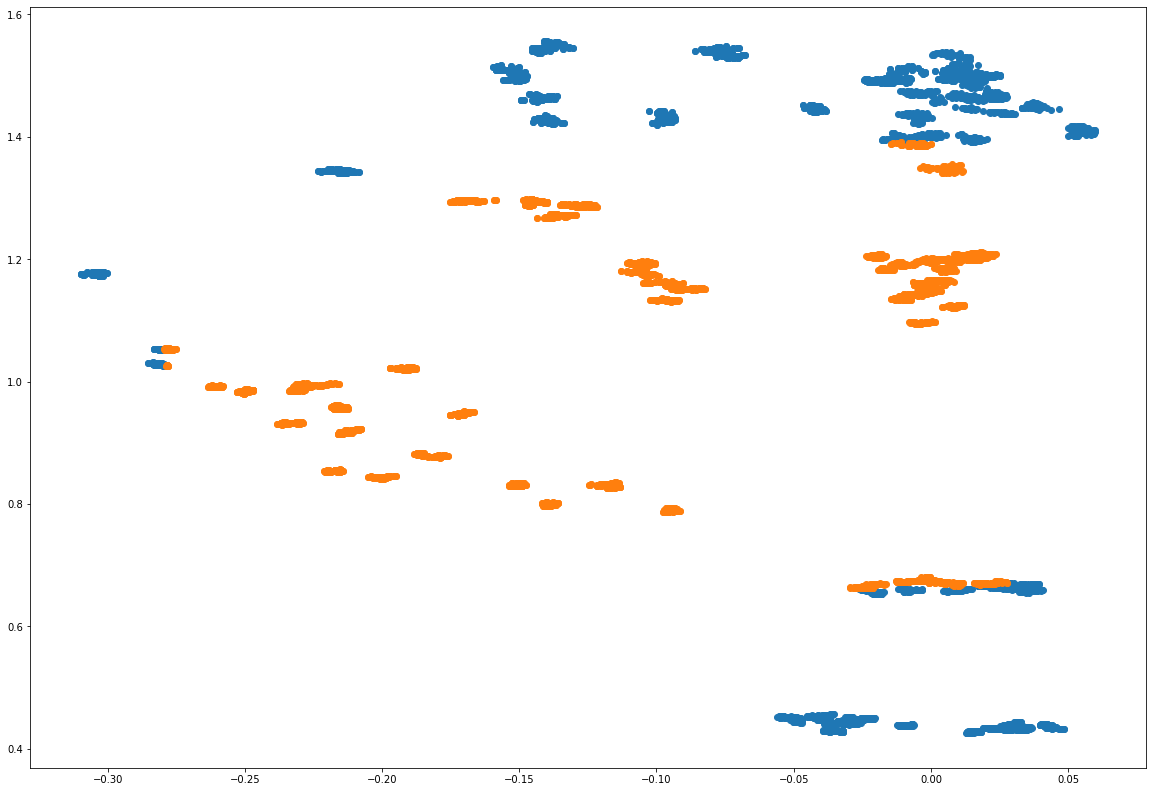

In [41]:
plt.scatter(df_N.loc[df_N['Pred'] == -1][0],df_N.loc[df_N['Pred'] == -1][1])
plt.scatter(df_N.loc[df_N['Pred'] == 1][0],df_N.loc[df_N['Pred'] == 1][1])